## Testing different multivariate distributions
- **multivariate t**
- **multivariate skew normal**
- **multivariate skew t distributions**
- **extended multivariate normal**

In [1]:
# Imports
import numpy as np

from multivariate_skew_normal import multivariate_skew_normal as MSN
from multivariate_skew_t import multivariate_skew_t as MST
from multivariate_t import multivariate_t as MT

from multivariate_normal_extended import multivariate_normal_extended as MNEXT

from scipy.stats import uniform as UNIF
from scipy.stats import multivariate_normal as MN
from scipy.stats import t as STUDENT

from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
%matplotlib inline

---

### The multivariate t distribution

[source: https://en.wikipedia.org/wiki/Multivariate_t-distribution]

**Parameters:**

 - location: $\mathbf\mu \in \mathbb{R}^p$
 - scale: $\mathbf\Sigma \in \mathbb{R}^{p \times p}$
 - degrees of freedom: $\nu \in \mathbb{R}$

**PDF:**

$$ f(\mathbf{x}; \mathbf\mu, \mathbf\Sigma, \nu) = 
\frac{\Gamma [(\nu + p) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{p/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left[ 1 + \frac{1}{\nu} (\mathbf{x} - \mathbf\mu)^T \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu) 
\right]^{-(\nu + p)/2} $$


$\nabla$**PDF:**

$$ \nabla f(\mathbf{x}; \mathbf\mu, \mathbf\Sigma, \nu) =
\frac{\Gamma [(\nu + p) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{p/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left[ 1 + \frac{1}{\nu} (\mathbf x - \mathbf\mu)^T \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu)
\right]^{-(\nu + p)/2-1} 
\left[ \frac{-(\nu + p)}{2} \frac{2}{\nu} \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu)
\right] $$

In [2]:
# Test 1: Numerical inspection of (log)pdf
# 1D case should be the same as stats.t

loc = UNIF.rvs()
scale = 1  # to ignore the difference between variance and standard deviation
df = UNIF.rvs(scale=10)

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_student = STUDENT.logpdf(x[0], df, loc=loc, scale=scale)
logv_mt = MT.logpdf(x[0], df, loc=loc, scale=scale)

print(logv_student)
print(logv_mt)

logv_student = STUDENT.logpdf(x, df, loc=loc, scale=scale)
logv_mt = MT.logpdf(x, df, loc=loc, scale=scale)

print(logv_student)
print(logv_mt)

-1.0196454068229306
-1.0196454068229306
[-1.01964541 -1.20277683 -4.86451164 -1.46152478 -2.90585061]
[-1.01964541 -1.20277683 -4.86451164 -1.46152478 -2.90585061]


In [3]:
# Test 2: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

loc = 1.
scale = 2.
df = 2

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MT.dpdf(x[0], df, loc=loc, scale=scale))
print(MT.dpdf(x, df, loc=loc, scale=scale))

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
df = 2

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MT.dpdf(x[0], df, loc=loc, scale=scale))
print(MT.dpdf(x, df, loc=loc, scale=scale))

-0.10484846831902851
[-0.10484847  0.03068189  0.08019243 -0.03737965 -0.08192488]
[-0.00076115 -0.00062032]
[[-7.61153918e-04 -6.20317191e-04]
 [-5.85048085e-04  6.94042929e-05]
 [-1.37577047e-04 -3.38765222e-05]
 [-7.74337121e-04  1.42920417e-04]
 [-2.28897828e-04 -1.42677727e-04]]


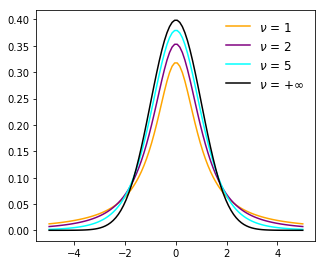

In [4]:
# Test 3: Visual test 1D pdf multiple dfs
# Compare with pdf in: https://en.wikipedia.org/wiki/Student%27s_t-distribution

loc = 0.
scale = 1.
dfs = [1, 2, 5, np.inf]
colors = ['orange', 'purple', 'cyan', 'black']

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(5,4.25))
for df, color in zip(dfs, colors):
    p = MT.pdf(x, df, loc=loc, scale=scale)
    plt.plot(x, p, c=color, label=r'$\nu$ = '+(r'+$\infty$' if np.inf == df else str(df)))
plt.legend(fontsize='large', loc='upper right', frameon=False)
plt.show()

Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg", width=350)

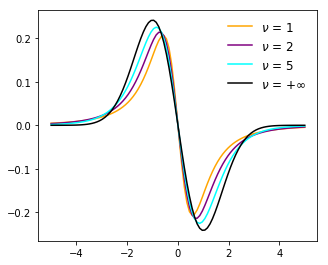

In [5]:
# Test 4: Visual test 1D derivative pdf multiple dfs

loc = 0.
scale = 1.
dfs = [1, 2, 5, np.inf]
colors = ['orange', 'purple', 'cyan', 'black']

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(5,4.25))
for df, color in zip(dfs, colors):
    p = MT.dpdf(x, df, loc=loc, scale=scale)
    plt.plot(x, p, c=color, label=r'$\nu$ = '+(r'+$\infty$' if np.inf == df else str(df)))
plt.legend(fontsize='large', loc='upper right', frameon=False)
plt.show()

In [6]:
# Test 5: Sanity check for code run of rvs
# 1D & 2D, 1 & 5 samples

loc = 1.
scale = 2.
df = 2

x1 = MT.rvs(df, loc=loc, scale=scale, size=1)
x5 = MT.rvs(df, loc=loc, scale=scale, size=5)
print(x1)
print(x5)

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
df = 2

x1 = MT.rvs(df, loc=loc, scale=scale, size=1)
x5 = MT.rvs(df, loc=loc, scale=scale, size=5)
print(x1)
print(x5)

0.8843146180582685
[ 3.02914234  0.47083312  0.66729829  0.45212062 -0.36410216]
[-2.46729429 -2.99856412]
[[-0.18508175  0.04786741]
 [-0.21100527 -0.79214991]
 [ 0.72888484  0.93194438]
 [ 0.6533065   0.8358207 ]
 [-0.66008453 -0.20897994]]


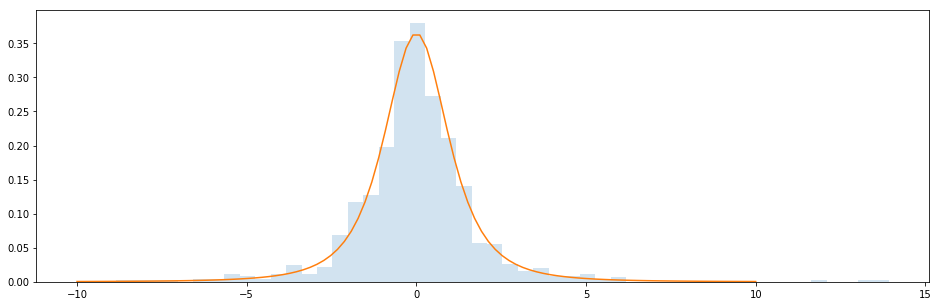

In [7]:
# Test 6: Sanity check for rvs vs pdf
# 1D histogram

loc = 0.
scale = 1
df = 2.74

r = MT.rvs(df, loc=loc, scale=scale, size=1000)

x = np.linspace(-10, 10, 100)
y = MT.pdf(x, df, loc=loc, scale=scale)

fig, ax = plt.subplots(1, 1, figsize=(16,5))
ax.hist(r, bins=50,density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, y)
plt.show()

---

### The multivariate skew normal distribution

[source: Statistical applications of the multivariate skew normal distribution - Azzalini A., Capitanio A. ( https://doi.org/10.1111/1467-9868.00194 )]

**Parameters:**

 - location: $\mathbf\xi \in \mathbb{R}^k$
 - scale: $\mathbf\Omega \in \mathbb{R}^{k \times k}$, 
 $\mathbf\Omega = \mathbf\omega \mathbf\Omega_z \mathbf\omega$, with 
 $\mathbf\omega = \sqrt{\mathbf\Omega} = \text{diag} \left\{ \sqrt{\mathbf\Omega_{ii}} \right\}_{i=1..k}$ 
 - shape: $\mathbf\alpha \in \mathbb{R}^k$

**PDF:**

$$ f_k(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \alpha) = 
2 \cdot \phi_k \left( \mathbf{y} - \mathbf\xi; \mathbf{0}, \mathbf\Omega \right) 
\ \Phi_1 \left( \mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 \right) = 
2 \cdot \frac{1}{(2 \pi)^{-k/2} \cdot | \mathbf\Omega |^{-1/2}} 
\ \Phi_1 \left( \mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 \right) $$

$\nabla$**PDF:**

$$ \nabla f_k(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \alpha) = 
2 \cdot \phi_k \left( \mathbf{y} - \mathbf\xi; \mathbf{0}, \mathbf\Omega \right) \left[
(\mathbf\alpha^T \mathbf\omega^{-1})^T
\cdot \phi_1 \left( 
\mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 
\right)
- \mathbf\Omega^{-1} (\mathbf{y} - \mathbf\xi)
\cdot \Phi_1 \left( \mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 \right) 
\right] $$

**Notation:** 
 - $\phi_k$ is the $k$-dimensional (multivariate) normal pdf
 - $\phi_1$ is the 1D (univarate) normal pdf
 - $\Phi_1$ is the 1D (univariate) normal cdf

In [8]:
# Test 1: Numerical inspection of (log)pdf
# shape == 0 should be the same as multivariate normal distribution
# 1D case, 1 & 5 values

loc = 1.
scale = 2.
shape = 0.

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_mn = MN.logpdf(x[0], mean=loc, cov=scale)
logv_msn = MSN.logpdf(x[0], loc=loc, scale=scale, shape=shape)

print(logv_mn)
print(logv_msn)

logv_mn = MN.logpdf(x, mean=loc, cov=scale)
logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)

print(logv_mn)
print(logv_msn)

-1.2824605766102155
-1.2824605766102155
[-1.28246058 -3.96847297 -1.7647942  -4.31917792 -3.16557866]
[-1.28246058 -3.96847297 -1.7647942  -4.31917792 -3.16557866]


In [9]:
# Test 2: Numerical inspection of (log)pdf
# shape == 0 should be the same as multivariate normal distribution
# 2D case, 5 values

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [0, 0]

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

logv_mn = MN.logpdf(x, mean=loc, cov=scale)
logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)

print(logv_mn)
print(logv_msn)

[-32.54850463 -23.51541862 -10.01738997 -10.3486608   -6.96653262]
[-32.54850463 -23.51541862 -10.01738997 -10.3486608   -6.96653262]


In [10]:
# Test 3: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

loc = 1.
scale = 2.
shape = 0.

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MSN.dpdf(x[0], loc=loc, scale=scale, shape=shape))
print(MSN.dpdf(x, loc=loc, scale=scale, shape=shape))

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MSN.dpdf(x[0], loc=loc, scale=scale, shape=shape))
print(MSN.dpdf(x, loc=loc, scale=scale, shape=shape))

-0.09140761276413072
[-0.09140761 -0.03961542 -0.09390177 -0.01813327 -0.02639325]
[-6.64328762e-15  4.63847897e-16]
[[-6.64328762e-15  4.63847897e-16]
 [-4.92581922e-05 -1.91627074e-04]
 [-4.19679391e-03 -3.70480974e-03]
 [-3.18693230e-17 -5.24119883e-19]
 [-3.27295187e-06  2.58699127e-07]]


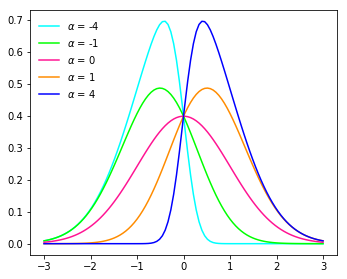

In [11]:
# Test 4: Visual test 1D pdf multiple shapes
# Compare with pdf in: https://en.wikipedia.org/wiki/Skew_normal_distribution

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'lime', 'deeppink', 'darkorange', 'blue']

x = np.linspace(-3, 3, 100)

plt.figure(figsize=(5.5,4.5))
for shape, color in zip(shapes, colors):
    p = MSN.pdf(x, loc=loc, scale=scale, shape=shape)
    plt.plot(x, p, c=color, label=r'$\alpha$ = '+str(shape))
plt.legend(fontsize='medium', loc='upper left', frameon=False)
plt.show()

Image(url= "https://upload.wikimedia.org/wikipedia/commons/6/63/Skew_normal_densities.svg", width=375)

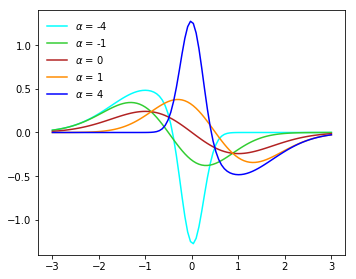

In [12]:
# Test 5: Visual test 1D derivative pdf multiple shapes

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'limegreen', 'firebrick', 'darkorange', 'blue']

x = np.linspace(-3, 3, 100)

plt.figure(figsize=(5.5,4.5))
for shape, color in zip(shapes, colors):
    dp = MSN.dpdf(x, loc=loc, scale=scale, shape=shape)
    plt.plot(x, dp, c=color, label=r'$\alpha$ = '+str(shape))
plt.legend(fontsize='medium', loc='upper left', frameon=False)
plt.show()

In [13]:
# Test 6: Sanity check for code run of rvs
# 1D & 2D, 1 & 5 samples

loc = 1.
scale = 2.
shape = 0.

x1 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=1)
x5 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]

x1 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=1)
x5 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

2.217749123887118
[ 0.34287465 -1.65205389  1.35236423 -0.32637597 -1.56892392]
[0.06299065 0.77281885]
[[0.0459021  0.91484421]
 [0.60569554 1.23301402]
 [0.78140429 1.14041157]
 [0.68046974 1.31694955]
 [0.04657489 0.40214333]]


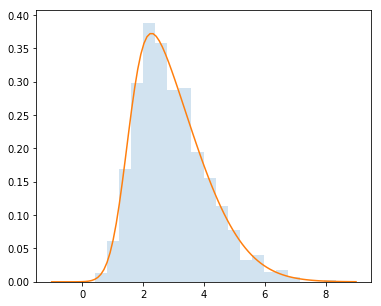

In [14]:
# Test 7: Sanity check for rvs vs pdf
# 1D histogram

loc = 1.5
scale = 3.5
shape = 4

r = MSN.rvs(loc=loc, scale=scale, shape=shape, size=1000)

x = np.linspace(-1, 9, 100)
y = MSN.pdf(x, loc=loc, scale=scale, shape=shape)

fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, y)
plt.show()

---

### The multivariate skew t distribution

[source: Distributions generated by perturbation of symmetry with emphasis on a multivariate skew t-distribution - Azzalini A., Capitanio A. ( https://doi.org/10.1111/1467-9868.00391 )]

**Parameters:**

 - location: $\mathbf\xi \in \mathbb{R}^d$
 - scale: $\mathbf\Omega \in \mathbb{R}^{d \times d}$,
 $\mathbf\Omega = \mathbf\omega \mathbf\Omega_z \mathbf\omega$, with 
 $\mathbf\omega = \sqrt{\mathbf\Omega} = \text{diag} \left\{ \sqrt{\mathbf\Omega_{ii}} \right\}_{i=1..d}$ 
 - shape: $\mathbf\alpha \in \mathbb{R}^d$
 - degrees of freedom: $\nu \in \mathbb{R}$

**PDF:**

$$ f_d(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \mathbf\alpha, \nu) = 
2 \cdot t_d(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \nu)
\cdot T_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d 
\right) $$
$$ = 2 \cdot \frac{\Gamma [(\nu + p) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{p/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left( 1 + \frac{1}{\nu} Q_\mathbf{y} \right)^{-(\nu + p)/2}
\cdot T_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d 
\right) , $$

where:

$$ \mathbf{z} = \mathbf\omega^{-1} ( \mathbf{y} - \mathbf\xi ), \quad 
Q_\mathbf{y} = ( \mathbf{y} - \mathbf\xi )^T \mathbf\Omega^{-1} ( \mathbf{y} - \mathbf\xi )
$$

$\nabla$**PDF:**

$$ \nabla f_d(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \mathbf\alpha, \nu) =
2 \cdot \frac{\Gamma [(\nu + d) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{d/2} \cdot | \mathbf\Omega |^{1/2}} 
\left( 1 + \frac{1}{\nu} Q_\mathbf{y} \right)^{-(\nu + p)/2-1} 
\left[ \frac{-(\nu + p)}{2} \frac{1}{\nu} \mathbf\Omega^{-1} (\mathbf{y} - \mathbf\xi) 
\right] 
\cdot T_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d
\right) $$
$$ +\ 2 \cdot \frac{\Gamma [(\nu + d) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{d/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left( 1 + \frac{1}{\nu} Q_\mathbf{y} \right)^{-(\nu + d)/2}
\cdot t_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d
\right) $$
$$ \cdot \ \left[ 
-\frac{1}{2} (\nu + d)^{1/2} (\nu + Q_\mathbf{y})^{-3/2} 
\ \mathbf\alpha^T \mathbf{z} \cdot \mathbf\Omega^{-1} (\mathbf{y} - \mathbf\xi)
+ (\nu + d)^{1/2} (\nu + Q_\mathbf{y})^{-1/2} \cdot (\mathbf\alpha^T \mathbf\omega^{-1})^T
\right]
$$

In [15]:
# Test 1: Numerical comparison of logpdf to multivariate t distribution
# i.e. shape == 0
# 1D & 2D, 1 & 5 values

loc = UNIF.rvs() * 5
scale = UNIF.rvs() * 5
shape = 0  # multiv. t 
df = UNIF.rvs() * 5

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_mt = MT.logpdf(x[0], df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

logv_mt = MT.logpdf(x, df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

print("~~~")

loc = UNIF.rvs(size=2) * 5
__scale__  = UNIF.rvs(size=2) * 5
scale = np.outer(__scale__, __scale__)
shape = np.zeros(2)  # multiv. t 
df = UNIF.rvs() * 5

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

logv_mt = MT.logpdf(x[0], df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

logv_mt = MT.logpdf(x, df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

-0.732090835189986
-0.732090835189986
[-0.73209084 -3.32511926 -2.59030815 -4.1164829  -0.83090463]
[-0.73209084 -3.32511926 -2.59030815 -4.1164829  -0.83090463]
~~~
-3.2424768267332005
-3.2424768267332005
[-3.24247683 -3.37247188 -3.55345853 -3.25821545 -3.8076119 ]
[-3.24247683 -3.37247188 -3.55345853 -3.25821545 -3.8076119 ]


In [16]:
# Test 2: Numerical comparison of logpdf to multivariate skew normal distribution
# i.e. df == np.inf
# 1D & 2D, 1 & 5 values

loc = UNIF.rvs() * 5
scale = UNIF.rvs() * 5
shape = UNIF.rvs() * 5
df = np.inf  # multiv. skew normal

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_msn = MSN.logpdf(x[0], loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

print("~~~")

loc = UNIF.rvs(size=2) * 5
__scale__  = UNIF.rvs(size=2) * 5
scale = np.outer(__scale__, __scale__)
shape = UNIF.rvs(size=2) * 5
df = np.inf  # multiv. skew normal

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

logv_msn = MSN.logpdf(x[0], loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

-2.8205369752268887
-2.8205369752268887
[ -2.82053698  -2.3444268  -29.48907625  -8.70990329 -50.57539837]
[ -2.82053698  -2.3444268  -29.48907625  -8.70990329 -50.57539837]
~~~
-66.25583504302541
-66.25583504302541
[-66.25583504 -34.47551879  -4.10856524  -5.18925662 -17.03772738]
[-66.25583504 -34.47551879  -4.10856524  -5.18925662 -17.03772738]


In [17]:
# Test 3: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

loc = 1.
scale = 2.
shape = 0.
df = 2.74

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MST.dpdf(x[0], df, loc=loc, scale=scale, shape=shape))
print(MST.dpdf(x, df, loc=loc, scale=scale, shape=shape))

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]
df = 1.74

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MST.dpdf(x[0], df, loc=loc, scale=scale, shape=shape))
print(MST.dpdf(x, df, loc=loc, scale=scale, shape=shape))

-0.030216327885642078
[-0.03021633 -0.05420359 -0.04584169 -0.01387032 -0.02314375]
[-0.0033046 -0.0142337]
[[-3.30460141e-03 -1.42336993e-02]
 [-9.75941128e-03 -8.91833132e-04]
 [-3.01193740e-03 -1.18302449e-03]
 [ 7.04357854e-03 -1.97471392e-02]
 [-5.50865454e-04  8.45746614e-06]]


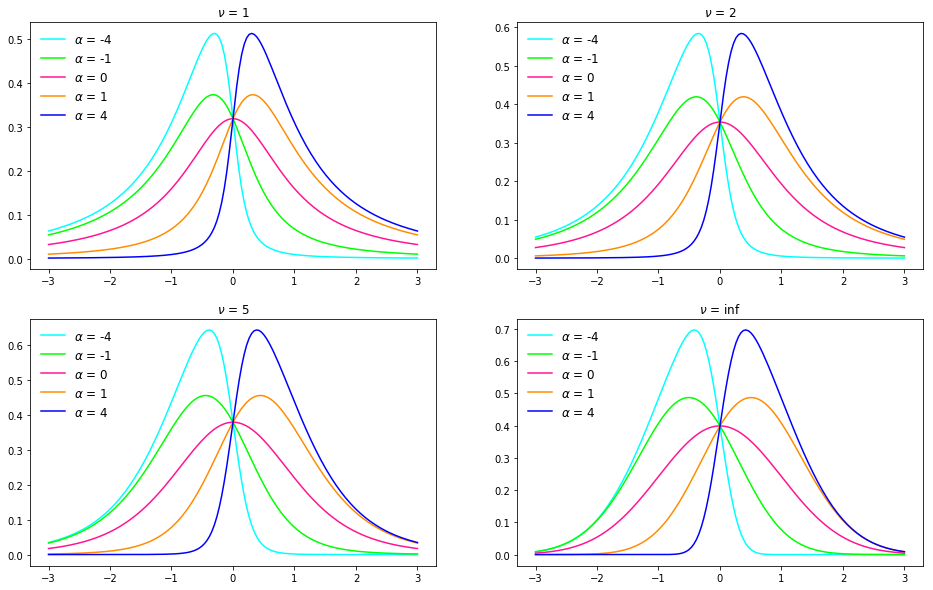

In [18]:
# Test 4: Visual test 1D pdf for multiple shapes and multiple dfs

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'lime', 'deeppink', 'darkorange', 'blue']
dfs = [1, 2, 5, np.inf]

x = np.linspace(-3, 3, 150)

fig, axs = plt.subplots(2, 2, figsize=(16,10))
for i, ax in enumerate(axs.flatten()):
    for shape, color in zip(shapes, colors):
        p = MST.pdf(x, dfs[i], loc=loc, scale=scale, shape=shape)
        ax.plot(x, p, c=color, label=r'$\alpha$ = '+str(shape))
    ax.legend(fontsize='large', loc='upper left', frameon=False)
    ax.set_title(r'$\nu$ = ' + str(dfs[i]))
plt.show()

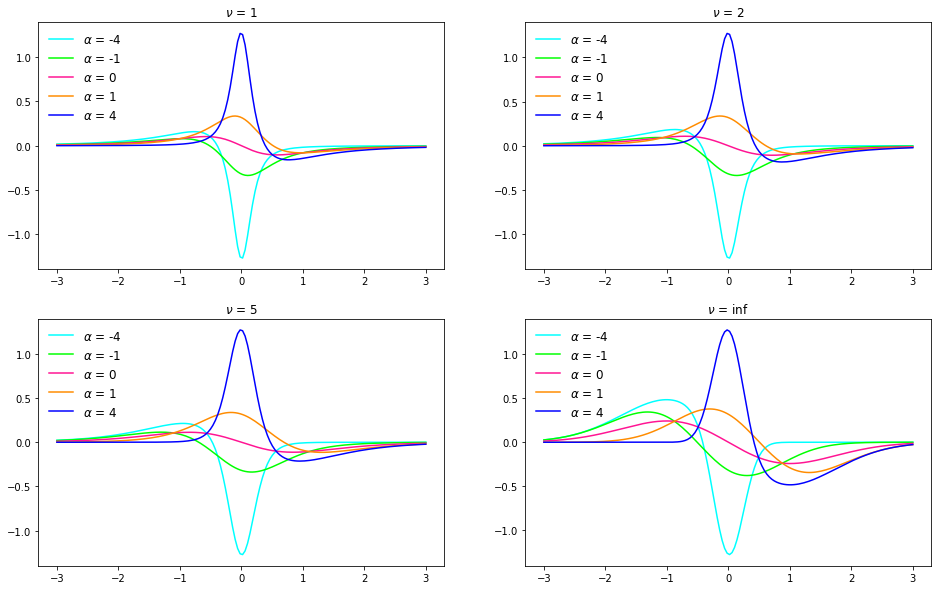

In [19]:
# Test 4: Visual test 1D derivative pdf for multiple shapes and multiple dfs

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'lime', 'deeppink', 'darkorange', 'blue']
dfs = [1, 2, 5, np.inf]

x = np.linspace(-3, 3, 150)

fig, axs = plt.subplots(2, 2, figsize=(16,10))
for i, ax in enumerate(axs.flatten()):
    for shape, color in zip(shapes, colors):
        p = MST.dpdf(x, dfs[i], loc=loc, scale=scale, shape=shape)
        ax.plot(x, p, c=color, label=r'$\alpha$ = '+str(shape))
    ax.legend(fontsize='large', loc='upper left', frameon=False)
    ax.set_title(r'$\nu$ = ' + str(dfs[i]))
plt.show()

In [20]:
# Test 5: Sanity check for code run of rvs
# 1D & 2D, 1 & 5 samples

loc = 1.
scale = 2.
shape = 0.
df = 2.74

x1 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=1)
x5 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]
df = 1.74

x1 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=1)
x5 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

1.1742974439004423
[-6.59622625  1.66746393 -1.01967066  4.46574296 -0.87729205]
[0.34322667 1.70838053]
[[0.07184656 1.11150089]
 [1.20638742 4.53193355]
 [0.18545369 1.06177035]
 [0.47601923 0.75129074]
 [1.63196485 2.10369879]]


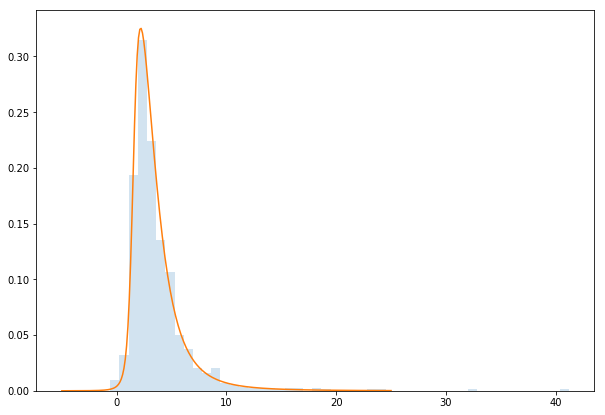

In [21]:
# Test 6: Sanity check for rvs vs pdf
# 1D histogram

loc = 1.5
scale = 3.5
shape = 4
df = 2.74

r = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=1000)

x = np.linspace(-5, 25, 250)
y = MST.pdf(x, df, loc=loc, scale=scale, shape=shape)

fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.hist(r, bins=50, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, y)
plt.show()

---

### Extension to the multivariate normal distribution

[source: SciPy & Wikipedia]

The SciPy implementation of the multivariate nromal distribution has been extended to also compute the gradient explicitly.

**Parameters:**

 - mean: $\mathbf\mu \in \mathbb{R}^k$
 - cov: $\mathbf\Sigma \in \mathbb{R}^{k \times k}$

**PDF:**

$$ f(\mathbf{x}; \mathbf\mu, \mathbf\Sigma) = (2 \pi)^{-\frac{k}{2}} \det (\mathbf\Sigma)^{-\frac{1}{2}}
\ e^{-\frac{1}{2} ( \mathbf{x} - \mathbf\mu )^T \mathbf\Sigma^{-1} ( \mathbf{x} - \mathbf\mu )} $$

$\nabla$**PDF:**

$$ \nabla f(\mathbf{x}; \mathbf\mu, \mathbf\Sigma) = (2 \pi)^{-\frac{k}{2}} \det (\mathbf\Sigma)^{-\frac{1}{2}} 
\ \left[ - \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu) \right]
\ e^{-\frac{1}{2} ( \mathbf{x} - \mathbf\mu )^T \mathbf\Sigma^{-1} ( \mathbf{x} - \mathbf\mu )} 
$$

In [22]:
# Sanity check to see that regular methods still work
for dim in range(1,4):
    mean = UNIF.rvs(size=dim)
    cov = np.diag(UNIF.rvs(size=dim))
    x = MNEXT.rvs(mean=mean, cov=cov, size=10)
    y = MNEXT.pdf(x, mean=mean, cov=cov)
    yexact = MN.pdf(x, mean=mean, cov=cov)
    assert (y == yexact).all()

In [23]:
# Test 1: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

mean = 1.
cov = 2.

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MNEXT.dpdf(x[0], mean=mean, cov=cov))
print(MNEXT.dpdf(x, mean=mean, cov=cov))

mean = [0.1, 0.4]
cov = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MNEXT.dpdf(x[0], mean=mean, cov=cov))
print(MNEXT.dpdf(x, mean=mean, cov=cov))

-0.058782630093522616
[-0.05878263 -0.07360709 -0.01540134  0.07705665 -0.12023342]
[-5.12112093e-07 -1.66705584e-06]
[[-5.12112093e-07 -1.66705584e-06]
 [-3.85711248e-02 -1.91967766e-01]
 [-3.54692776e-15 -1.54952380e-15]
 [-1.05173162e-09 -3.83875052e-10]
 [-8.08242471e-06 -3.81032215e-05]]


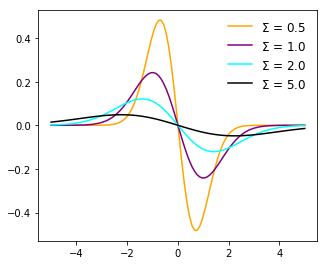

In [24]:
# Test 2: Visual test 1D derivative pdf
mean = 0.
covs = [0.5, 1., 2., 5.]
colors = ['orange', 'purple', 'cyan', 'black']

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(5,4.25))
for cov, color in zip(covs, colors):
    p = MNEXT.dpdf(x, mean=mean, cov=cov)
    plt.plot(x, p, c=color, label=r'$\Sigma$ = '+ str(cov))
    plt.legend(fontsize='large', loc='upper right', frameon=False)
plt.show()